# Comparación de modelos

A falta de recurso computacional para llevar a cabo un grid search, este notebook compara los diferentes modelos. Todos ellos son modelos secuenciales, que forman parte de una red neuronal convolucional de dos dimensiones.

La __Métrica de comparación de modelos__ utilizada es la métrica __Recall__, la cual muestra el porcentaje de positivos reales que se clasificaron correctamente. Como tratamos de diagnosticar qué plantas de maíz están enfermas, entonces, es de vital importancia identificar bien a todas las que sí que lo estén, y reducir el error de que no queden clasificadas como enfermas.

Como no se ha aplicado un grid-search, la comparación de modelos manual debe seguir un número de entrenamientos similar para ser comparable. por ende, utilizamos un "epoch" de 5. Finalmente, para optimizar el modelo con mejor rendimiento si que optimizamos también el "epoch".

==================================================================================================

### índice:
1. Modelos

    1A. Modelos construidos desde cero
    
    1B. Modelos construidos a partir de Transfer Learning

2. Parámetros de optimización del modelo con mejor rendimiento
3. El modelo final optimizado: my_model

In [1]:
# ================================================================================================================================
# CARGAMOS FUNCIONES 
# ================================================================================================================================

# Funciones
# ================================================================================================================================
import os, sys
sys.path.insert(1, r'C:\Users\gonza\OneDrive\Escritorio\Bootcamp_DS\Alumno\ds_thebridge_1_22\3-Machine_Learning\Entregas\utils')
from funciones import procesamiento_de_datos_X, procesamiento_de_datos_y, define_x_y, contar_imagenes
from funciones import plot_cm, metricas, plot_roc_curve, recall 

# Tratamiento de datos
# ==============================================================================
import os
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Tratamiento de imágenes
# ==============================================================================
from tensorflow import keras
from keras import regularizers  
from keras import layers 
from keras.models import Sequential
from keras.layers import Conv2D, Activation, Dropout, Flatten, Dense, BatchNormalization

# Evaluación del modelo
# ==============================================================================
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, auc, roc_curve

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [2]:
# ================================================================================================================================
# CARGAMOS DATOS
# ================================================================================================================================
# Path
path_train = '../data/processed/train'
path_val = '../data/processed/val'
path_test = '../data/processed/test'
tipos = os.listdir(path_train)

# ================================================================================================================================
# Definimos variables
X_train, y_train = define_x_y(path_train)
X_val, y_val = define_x_y(path_val)
X_test, y_test = define_x_y(path_test)

# ================================================================================================================================
# Procesamiento de datos
X_train, X_val, X_test = procesamiento_de_datos_X(X_train, X_val, X_test)
y_train, y_val, y_test = procesamiento_de_datos_y(y_train, y_val, y_test)

# ================================================================================================================================

# 1. Modelos
==================================================================================================

## 1A. Modelos construidos desde cero:
- __model_vo__: se le aplica la técnica de "data augmentation" para optimizar el modelo.


In [3]:
model_v0 = keras.models.load_model("../model/model_v0")

## 1B. Modelos construidos a partir de __Transfer Learning__:

Una red neuronal permite añadir varias capas de aprendizaje de forma secuencial. Se puede comenzar desde cero, de tal forma que el modelo parta de una base en blanco, o se le puede dar otra red neuronal de entrada para que entrene y aprenda partiendo de un conocimiento previo.


- __model_v1__: la red neuronal base aplicada es "MobileNet".

- __model_v2__: la red neuronal base aplicada es "mobilenet_v3_large_100_224".

- __model_v3__: la red neuronal base aplicada es "cassava_disease_V1".

- __model_v4__: la red neuronal base aplicada es "concat".

- __model_v5__: la red neuronal base aplicada es "imagenet".

In [4]:
model_v1 = keras.models.load_model("../model/model_v1")
model_v2 = keras.models.load_model("../model/model_v2")
model_v3 = keras.models.load_model("../model/model_v3")
model_v4 = keras.models.load_model("../model/model_v4")
model_v5 = keras.models.load_model("../model/model_v5")

In [5]:
# Creamos dataframe con los recall de cada modelo

evaluacion = pd.DataFrame(['model_v0', 'model_v1', 'model_v2', 'model_v3', 'model_v4', 'model_v5'])
evaluacion['recall'] = [recall_score(y_test, np.argmax(model_v0.predict(X_test), axis=1), average='weighted'), 
                        recall_score(y_test, np.argmax(model_v1.predict(X_test), axis=1), average='weighted'), 
                        recall_score(y_test, np.argmax(model_v2.predict(X_test), axis=1), average='weighted'), 
                        recall_score(y_test, np.argmax(model_v3.predict(X_test), axis=1), average='weighted'), 
                        recall_score(y_test, np.argmax(model_v4.predict(X_test), axis=1), average='weighted'), 
                        recall_score(y_test, np.argmax(model_v5.predict(X_test), axis=1), average='weighted')
                        ]

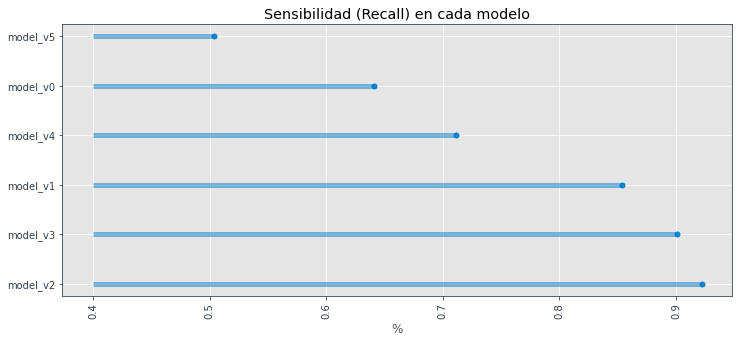

In [6]:
recall(evaluacion.sort_values(by='recall', ascending=False).iloc[:,0], y_test, evaluacion.sort_values(by='recall', ascending=False).iloc[:,1])

__Mejor modelo__: el modelo con mejor rendimiento ante datos nuevos es el "model_v2".

In [7]:
evaluacion.sort_values(by='recall', ascending=False)

,0,recall
2,model_v2,0.921986
3,model_v3,0.900709
1,model_v1,0.853428
4,model_v4,0.711584
0,model_v0,0.640662
5,model_v5,0.503546


# 2. Parámetros de optimización del modelo con mejor rendimiento
==================================================================================================

Modelos: el modelo que mejor rendimiento da es cuando se construye a partir de Transfer Learning, con el modelo base "mobilenet_v3_large_100_224" (model_v2). El modelo base ha sido publicado por: Andrew Howard, Mark Sandler, Grace Chu, Liang-Chieh Chen, Bo Chen, Mingxing Tan, Weijun Wang, Yukun Zhu, Ruoming Pang, Vijay Vasudevan, Quoc V. Le, Hartwig Adam: "Searching for MobileNetV3", 2019; y está disponible al público en __[TensorFlow Hub](https://tfhub.dev/)__.

Tratamos de optimizarlo en los siguientes modelos:

- __model_v6__: la red neuronal base aplicada es "mobilenet_v3_large_100_224", al igual que en el "model_v2". Para optimizarlo, se le aplica la técnica de "data augmentation".

- __model_v7__: la red neuronal base aplicada es "mobilenet_v3_large_100_224", al igual que en el "model_v2". Para optimizarlo, se le aplican pesos para tratar de optimizar el modelo.

In [8]:
model_v6 = keras.models.load_model("../model/model_v6")
model_v7_pesos = keras.models.load_model("../model/model_v7_pesos")

In [9]:
evaluacion2 = pd.DataFrame(['model_v2', 'model_v6', 'model_v7_pesos'])
evaluacion2['recall'] = [recall_score(y_test, np.argmax(model_v2.predict(X_test), axis=1), average='weighted'), 
                        recall_score(y_test, np.argmax(model_v6.predict(X_test), axis=1), average='weighted'), 
                        recall_score(y_test, np.argmax(model_v7_pesos.predict(X_test), axis=1), average='weighted')
                        ]

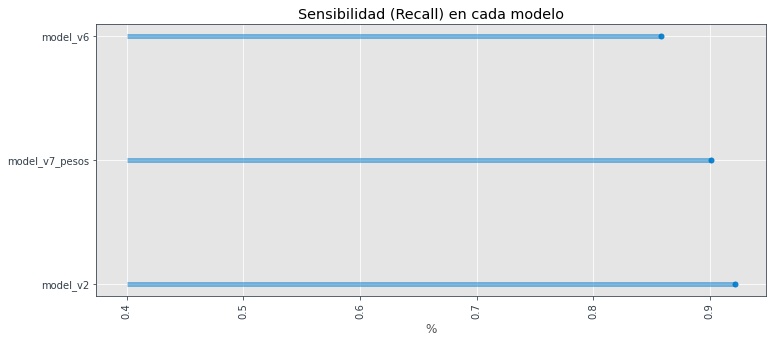

In [10]:
recall(evaluacion2.sort_values(by='recall', ascending=False).iloc[:,0], y_test, evaluacion2.sort_values(by='recall', ascending=False).iloc[:,1])

In [11]:
evaluacion2.sort_values(by='recall', ascending=False)

,0,recall
0,model_v2,0.921986
2,model_v7_pesos,0.900709
1,model_v6,0.858156


__Mejor modelo__: nuevamente el modelo con mejor rendimiento ante datos nuevos es el "model_v2", por lo que en este caso no se optimiza si aplicamos pesos o si aplicamos la técnica de "data augmentation".

# 3. El modelo final optimizado: my_model

==================================================================================================

A partir del modelo base "mobilenet_v3_large_100_224", tratamos de optimizarlo sin aplicar la técnica de "data augmentation" y sin aplicar pesos, ya que hemos visto que no mejora el rendimiento del modelo ante datos nuevos. Por otro lado, utilizamos un epoch variable, es decir, que se entrena un número de veces óptimo ante la función de pérdidas en la muestra de validación.

In [12]:
my_model = keras.models.load_model("../model/my_model")

In [13]:
evaluacion3 = pd.DataFrame(['model_v2', 'model_v6', 'model_v7_pesos', 'my_model'])
evaluacion3['recall'] = [recall_score(y_test, np.argmax(model_v2.predict(X_test), axis=1), average='weighted'),
                        recall_score(y_test, np.argmax(model_v6.predict(X_test), axis=1), average='weighted'), 
                        recall_score(y_test, np.argmax(model_v7_pesos.predict(X_test), axis=1), average='weighted'),
                        recall_score(y_test, np.argmax(my_model.predict(X_test), axis=1), average='weighted')
                        ]

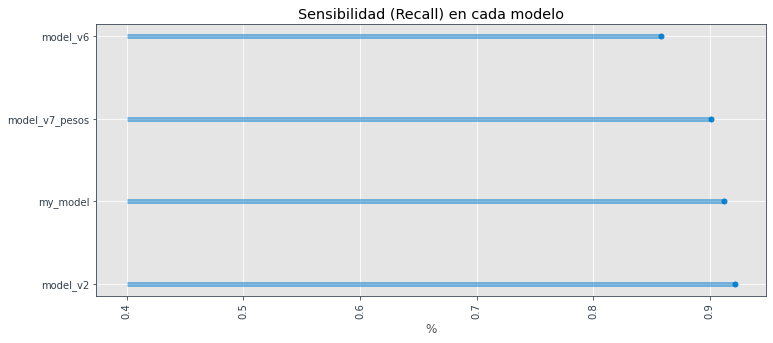

In [14]:
recall(evaluacion3.sort_values(by='recall', ascending=False).iloc[:,0], y_test, evaluacion3.sort_values(by='recall', ascending=False).iloc[:,1])

In [15]:
evaluacion3.sort_values(by='recall', ascending=False)

,0,recall
0,model_v2,0.921986
3,my_model,0.912530
2,model_v7_pesos,0.900709
1,model_v6,0.858156


Se ha escogido como modelo óptimo __"my_model"__ porque ha utilizado el método que mejor generaliza ante datos nuevos (optimizando el 'epoch' en la muestra de validación). Por ende, es el modelo más escalable, aunque en este caso tenga una precisión (_accuracy_) menor en test que el "model_v2".

Su ligero menor rendimiento que el "model_v2" puede estar condicionado a que el conjunto muestral acarrea grandes diferencias en las muestras de validación y test. A continuación vemos cómo se comportan los modelos ante la muestra de validación.

In [16]:
evaluacion31 = pd.DataFrame(['model_v2', 'model_v6', 'model_v7_pesos', 'my_model'])
evaluacion31['recall'] = [recall_score(y_val, np.argmax(model_v2.predict(X_val), axis=1), average='weighted'),
                        recall_score(y_val, np.argmax(model_v6.predict(X_val), axis=1), average='weighted'), 
                        recall_score(y_val, np.argmax(model_v7_pesos.predict(X_val), axis=1), average='weighted'),
                        recall_score(y_val, np.argmax(my_model.predict(X_val), axis=1), average='weighted')
                        ]

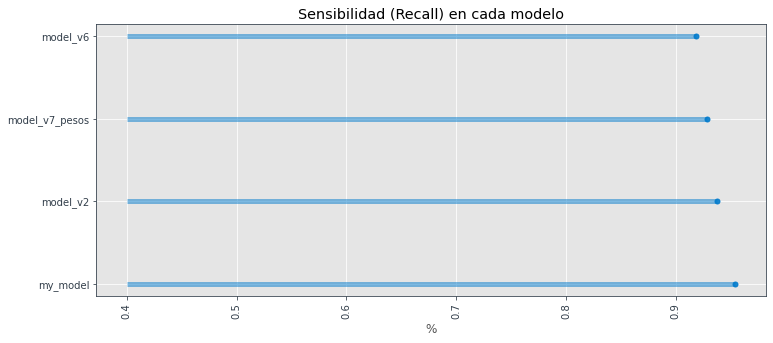

In [17]:
recall(evaluacion31.sort_values(by='recall', ascending=False).iloc[:,0], y_test, evaluacion31.sort_values(by='recall', ascending=False).iloc[:,1])

In [18]:
evaluacion31.sort_values(by='recall', ascending=False)

,0,recall
3,my_model,0.954436
0,model_v2,0.937650
2,model_v7_pesos,0.928058
1,model_v6,0.918465


# Comparación global de modelos

In [19]:
evaluacion_g = pd.DataFrame(['model_v0', 'model_v1', 'model_v2', 'model_v3', 'model_v4', 'model_v5', 'model_v6', 'model_v7_pesos', 'my_model'])
evaluacion_g['recall'] = [recall_score(y_test, np.argmax(model_v0.predict(X_test), axis=1), average='weighted'), 
                        recall_score(y_test, np.argmax(model_v1.predict(X_test), axis=1), average='weighted'), 
                        recall_score(y_test, np.argmax(model_v2.predict(X_test), axis=1), average='weighted'), 
                        recall_score(y_test, np.argmax(model_v3.predict(X_test), axis=1), average='weighted'), 
                        recall_score(y_test, np.argmax(model_v4.predict(X_test), axis=1), average='weighted'), 
                        recall_score(y_test, np.argmax(model_v5.predict(X_test), axis=1), average='weighted'),
                        recall_score(y_test, np.argmax(model_v6.predict(X_test), axis=1), average='weighted'), 
                        recall_score(y_test, np.argmax(model_v7_pesos.predict(X_test), axis=1), average='weighted'),
                        recall_score(y_test, np.argmax(my_model.predict(X_test), axis=1), average='weighted')
                        ]

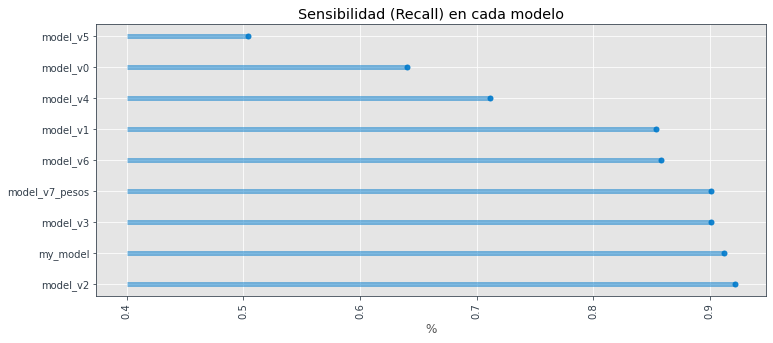

In [20]:
recall(evaluacion_g.sort_values(by='recall', ascending=False).iloc[:,0], y_test, evaluacion_g.sort_values(by='recall', ascending=False).iloc[:,1])

In [21]:
evaluacion_g.sort_values(by='recall', ascending=False)

,0,recall
2,model_v2,0.921986
8,my_model,0.912530
3,model_v3,0.900709
7,model_v7_pesos,0.900709
6,model_v6,0.858156
1,model_v1,0.853428
4,model_v4,0.711584
0,model_v0,0.640662
5,model_v5,0.503546


### En definitiva: el modelo óptimo es __"my_model"__

Se ha escogido el modelo "my_model" como aquel que mejor generaliza ante datos nuevos y más escalable.

Puede parecer que el "model_v2" es el que mejor resultado ha obtenido en la muestra de test. No obstante, esta ligera diferencia en el rendimiento puede deberse a la descompensación en los datos de valiadación y del test, por lo que se opta por el modelo con mejor escalabilidad.